In [1]:
import os
from os import path,listdir
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as  tf
import tensorflow_hub as hub
from IPython.display import Image
from sklearn.model_selection import train_test_split

In [2]:
print(tf.__version__)

2.13.0-rc0


In [3]:
print(hub.__version__)

0.13.0


In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
file_path = "../dog_classification_TF/dog-breed-identification/"

# Changing the images in numerical representation ( tensors)

In [6]:
images_path = path.join(file_path , 'labels.csv')

In [7]:
labels_df = pd.read_csv(images_path)

In [8]:
labels_df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [9]:
labels_df.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

# breed wise images

In [10]:
bread_count= labels_df.breed.value_counts().reset_index()

In [11]:
bread_count

index  breed
0      scottish_deerhound    126
1             maltese_dog    117
2            afghan_hound    116
3             entlebucher    115
4    bernese_mountain_dog    114
..                    ...    ...
115      golden_retriever     67
116     brabancon_griffon     67
117              komondor     67
118            eskimo_dog     66
119                briard     66

[120 rows x 2 columns]

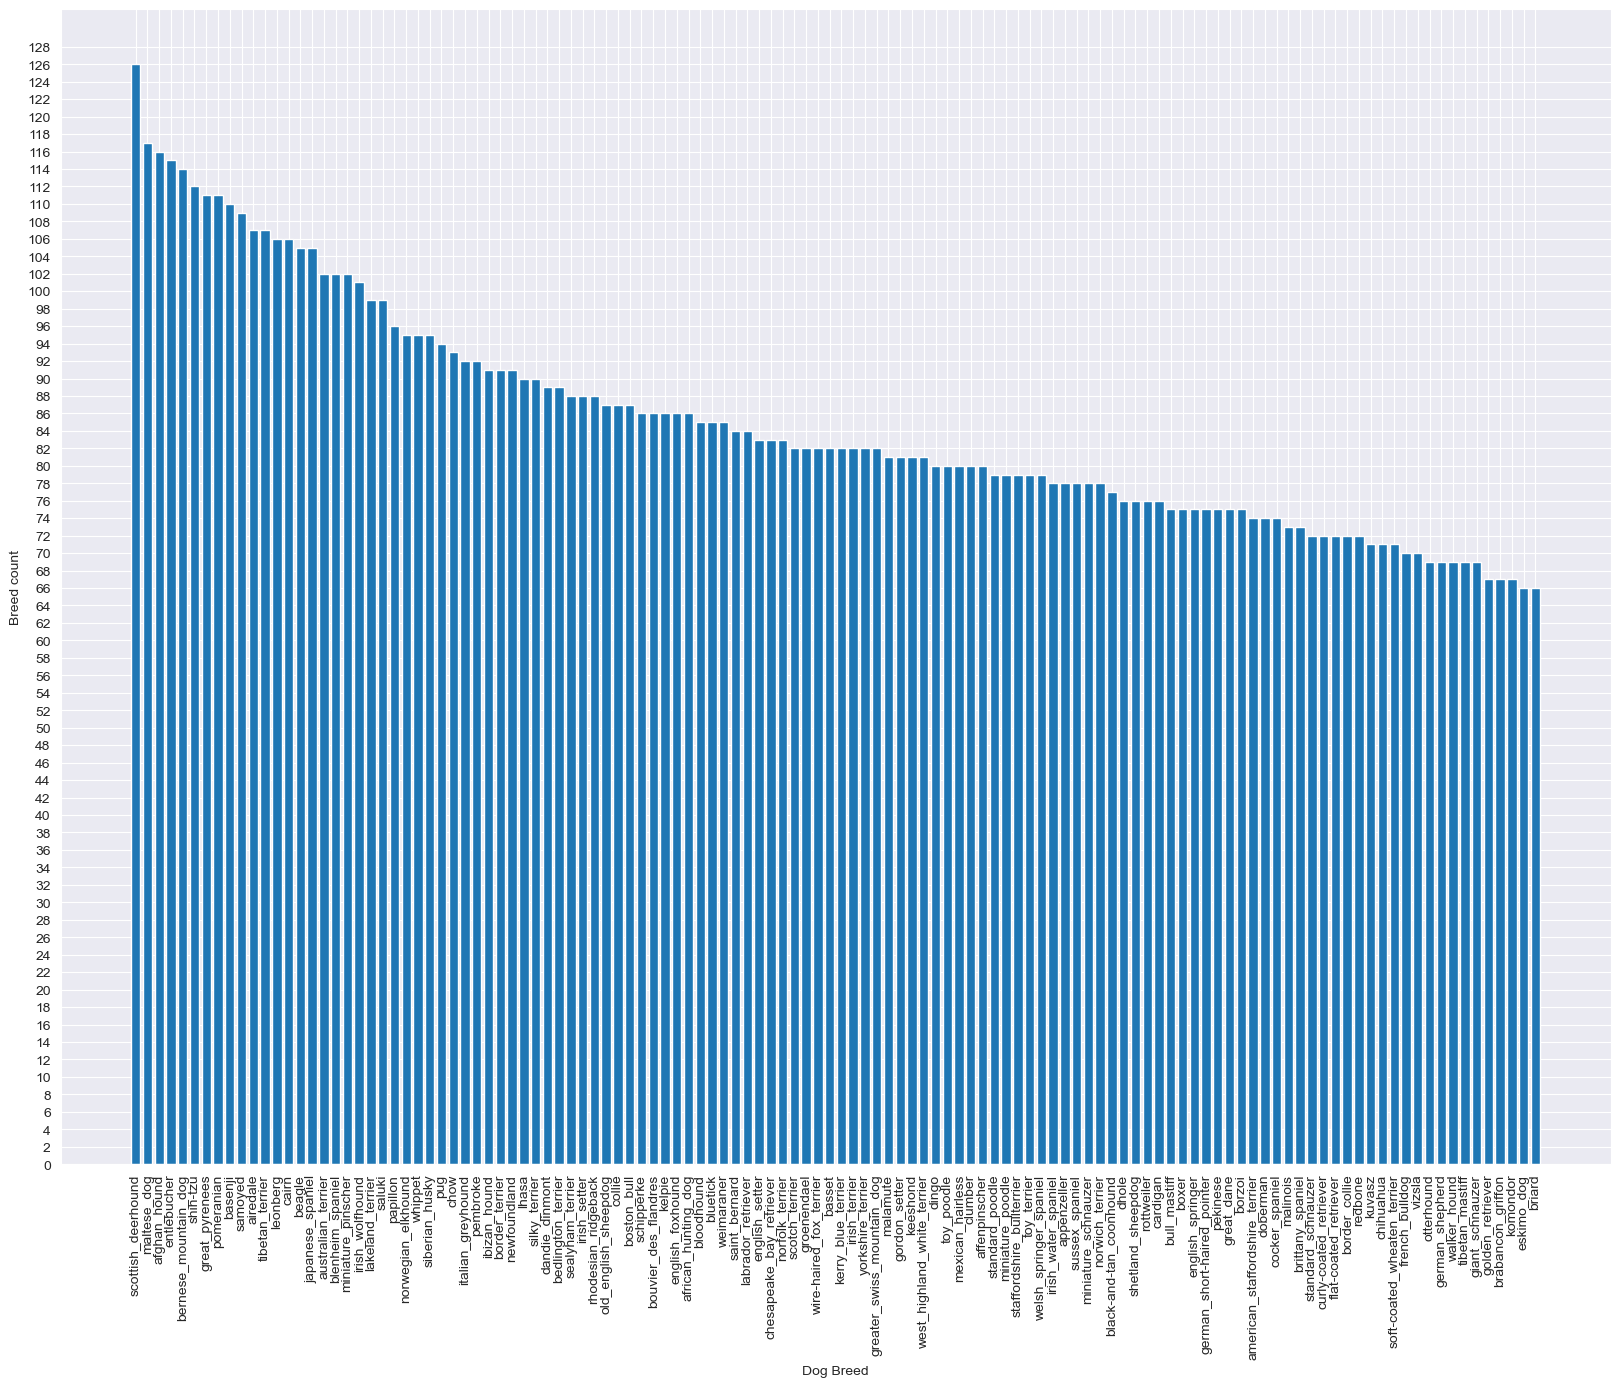

In [12]:
plt.figure(figsize=(20,15))
plt.bar(bread_count['index'],bread_count['breed'])
plt.xticks(ticks=range(0,len(bread_count['index'])),labels=bread_count['index'],rotation='vertical')
plt.yticks(ticks=range(0,max(bread_count['breed'])+3,2))
plt.xlabel("Dog Breed")
plt.ylabel("Breed count")
plt.show()

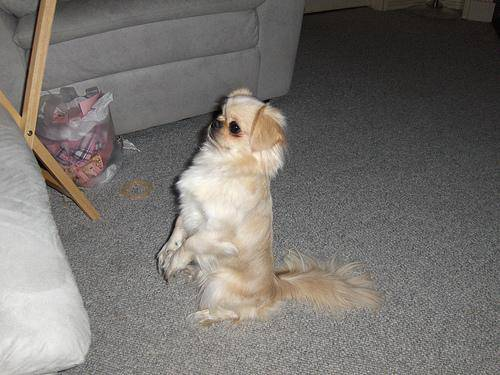

In [13]:
Image(path.join(file_path,'train','001cdf01b096e06d78e9e5112d419397.jpg'))

In [14]:
image_names = [path.join(file_path,'train',name+'.jpg') for name in labels_df.id]

In [15]:
if len(listdir(path.join(file_path,'train'))) == len(image_names):
    print("both file names are equal")
else:
    print("not equal")

both file names are equal


# convert the array to numpy array list


In [16]:
dog_labels = labels_df.breed.to_numpy()

In [17]:
dog_labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [18]:
if len(dog_labels) == len(image_names):
    print("success, the count matches")
else:
    print("count not match, check directories")

success, the count matches


## convert the dog names to numerical data ( machin understanble number)

In [19]:
# unique value dog names
unique_dog_labels  = np.unique(dog_labels)

In [20]:
len(unique_dog_labels)

120

In [21]:
breed_labels = [label == unique_dog_labels for label in dog_labels]

In [22]:
len(breed_labels)

10222

In [23]:
np.where(dog_labels[0] == unique_dog_labels)

(array([19]),)

In [24]:
breed_labels[0].argmax()

19

In [25]:
print(breed_labels[0].astype(int))
print(breed_labels[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


## Creating a validation set from training set

In [26]:
NUM_IMAGES = 1000

In [27]:
dog_labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [28]:
# Split into training and validation of total size (NUM_IMAGES)
X = image_names
Y = breed_labels
X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                               Y[:NUM_IMAGES],
                                               random_state=42,
                                               test_size=0.2)

In [29]:
len(X_train),len(y_train)

(800, 800)

In [30]:
len(X_val), len(y_val)

(200, 200)

## Preprocessing the images ( converting to tensors)

In [31]:
image_arr = plt.imread(image_names[42])
image_arr.shape

(257, 350, 3)

In [32]:
tf.constant(image_arr)

Metal device set to: Apple M1


2023-06-08 15:34:59.433441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-08 15:34:59.433459: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [33]:
IMG_SIZE = 224

In [34]:
def process_image(image_path):
    """
    take the image fiel patha nd convert it to a tensors
    :param image_path:
    :return:
    """

    # Read the file
    image = tf.io.read_file(image_path)
    # Turn the jpeg fiel into tensors
    image = tf.image.decode_jpeg(image,channels=3)
    # Convert color channel values to 0-255  to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
    # resize the Image
    image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
    return image


In [35]:
# batch running batch size is 32 . OS 32 image will be processed at a time.

def create_data_tuple(image_path, label):

    image = process_image(image_path)
    return image,label


In [36]:
BATCH_SIZE = 32

In [37]:
def create_batch_data(x,y=None,batch_size= BATCH_SIZE,valid_data= False,test_data= False):
    """

    :param X: The DF of images
    :param y: teh Labels ( dog breed names).
    :param batch_size: 32
    :param valid_data: Boolean value for validation data
    :param test_data: Boolean value for test data
    :return:
    """

    if test_data:
        print('Testing...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
        data_batch = data.map(process_image).batch(batch_size)

    elif valid_data:
        print('Validation data..')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                   tf.constant(y)))
        data_batch = data.map(create_data_tuple).batch(batch_size)

    else:
        print("training ...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                   tf.constant(y)))
        # Shuflling the data
        data = data.shuffle(buffer_size=len(x))

        data = data.map(create_data_tuple)
        data_batch = data.batch(batch_size)
    return data_batch

In [38]:
y_train[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [39]:
train_data = create_batch_data(X_train,y_train)
validation_data = create_batch_data(X_val,y_val,valid_data=True)

training ...
Validation data..


In [40]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [41]:
validation_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [42]:
def show_images(images,labels,plot_count=30):
    plt.figure(figsize=(12,12))

    #loop through image count
    for i in range(plot_count):
        ax = plt.subplot(5,6,i+1)
        plt.imshow(images[i])
        plt.title(unique_dog_labels[labels[i].argmax()])
        plt.axis('off')

In [43]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [44]:
train_images, train_labels = next(train_data.as_numpy_iterator())

2023-06-08 15:34:59.543960: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [800,120]
	 [[{{node Placeholder/_1}}]]
2023-06-08 15:34:59.544084: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [800,120]
	 [[{{node Placeholder/_1}}]]


In [45]:
(train_images.shape)

(32, 224, 224, 3)

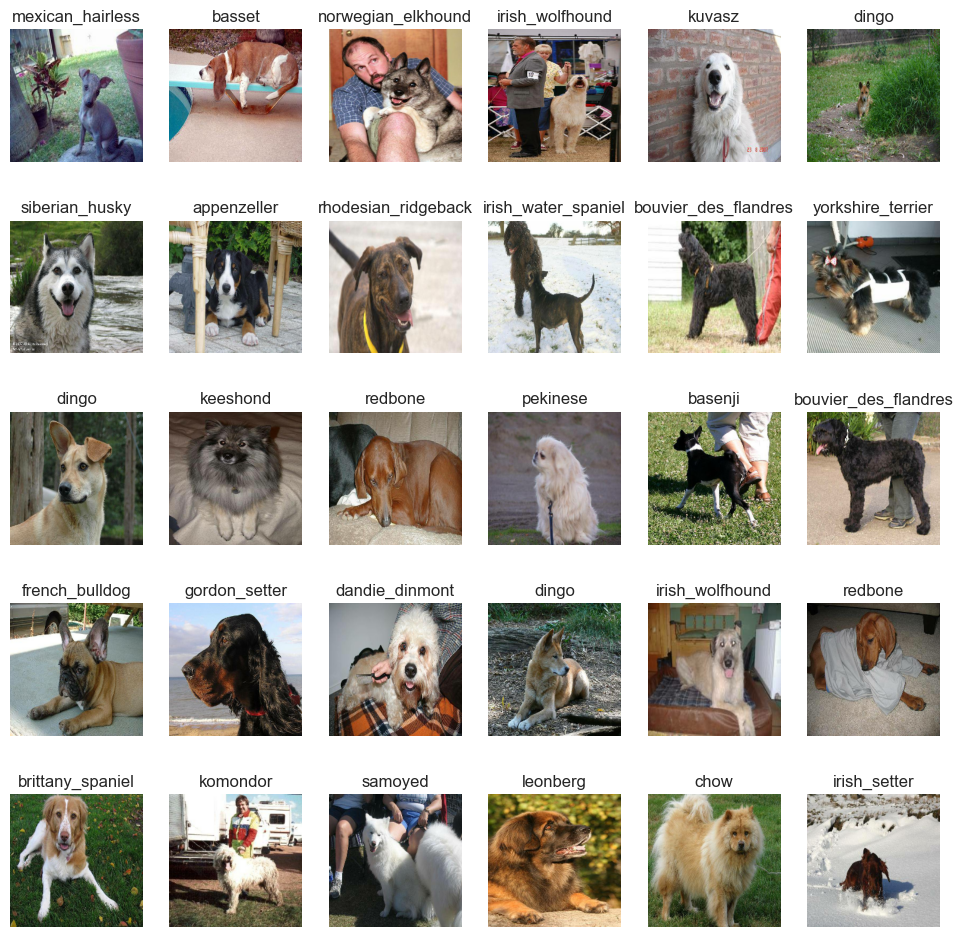

In [46]:
# plot the images
show_images(train_images,train_labels)

In [47]:
val_images,val_labels = next(validation_data.as_numpy_iterator())

2023-06-08 15:35:01.082368: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [200,120]
	 [[{{node Placeholder/_1}}]]


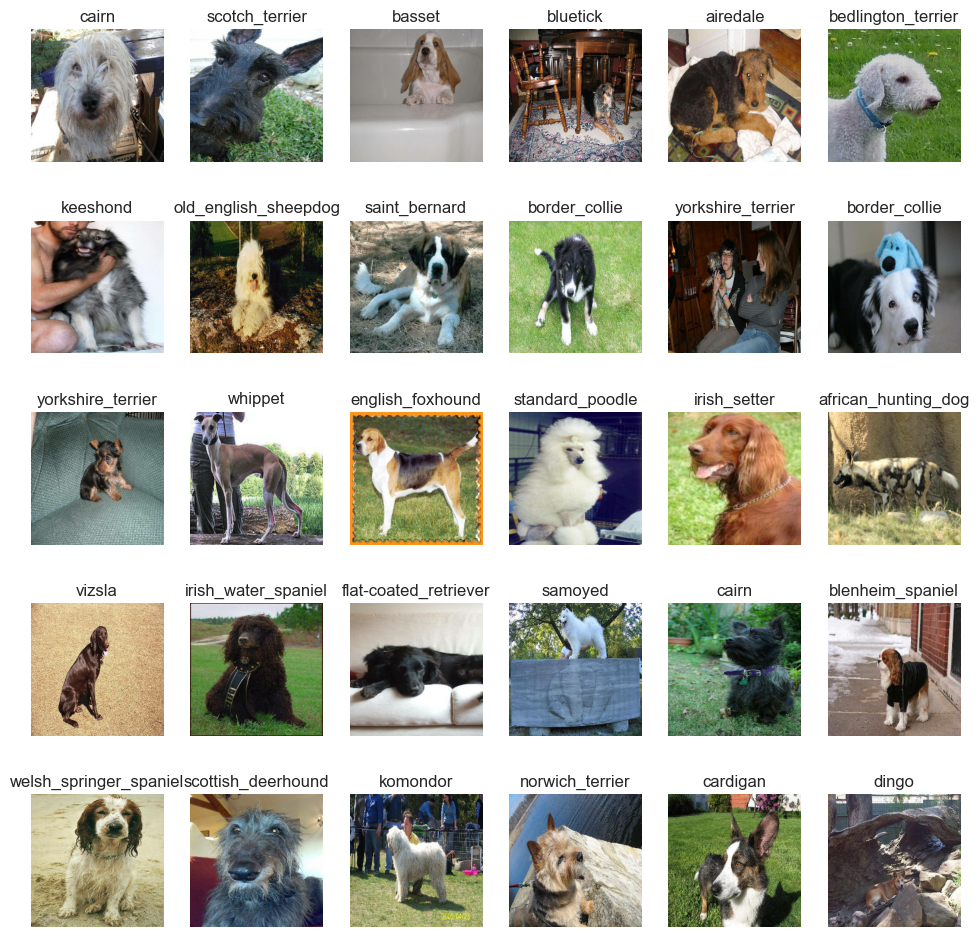

In [48]:
show_images(val_images,val_labels)

In [49]:
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE= len(unique_dog_labels)
model_path =r'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

In [50]:

def create_model(input_shape= INPUT_SHAPE,output_shape =OUTPUT_SHAPE,model_url=model_path):

    model = tf.keras.Sequential([
        hub.KerasLayer(model_path),
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation='softmax')
    ])
    model.build([None, 224, 224, 3]) # Batch input shape.

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        # optimizer=tf.keras.optimizers.Adam(),
        optimizer=tf.keras.optimizers.legacy.Adam(), # for MAC M1/M2 systems
        metrics=["Accuracy"]
    )
    return model




In [51]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [52]:
# create helper functions to save the progress
%load_ext tensorboard
import datetime

In [53]:
def create_tensorboard_callback():
    logdir = path.join('../dog_classification_TF/logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    return tf.keras.callbacks.TensorBoard(logdir)

In [54]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_Accuracy", patience=3)

In [55]:
NUM_EPOCHS = 100

In [56]:
def train_model():
    model = create_model()
    tensorboard= create_tensorboard_callback()
    model.fit(x=train_data,epochs=NUM_EPOCHS,
              validation_data=validation_data,
              validation_freq=1,
              callbacks=[tensorboard,early_stopping] )
    return model

In [57]:
model = train_model()

Epoch 1/100


2023-06-08 15:35:04.868449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 4.4987 - Accuracy: 0.0988

2023-06-08 15:35:09.695835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 7s 238ms/step - loss: 4.4987 - Accuracy: 0.0988 - val_loss: 3.2855 - val_Accuracy: 0.3000
Epoch 2/100
25/25 [==============================] - 6s 222ms/step - loss: 1.5725 - Accuracy: 0.6900 - val_loss: 2.0214 - val_Accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 5s 220ms/step - loss: 0.5375 - Accuracy: 0.9525 - val_loss: 1.5626 - val_Accuracy: 0.6250
Epoch 4/100
25/25 [==============================] - 5s 217ms/step - loss: 0.2415 - Accuracy: 0.9900 - val_loss: 1.3729 - val_Accuracy: 0.6750


In [58]:
%tensorboard --logdir /Volumes/Work/programming/project/ML_project/dog_classification_TF/logs

Launching TensorBoard...

In [59]:
# Making predictions
predictions = model.predict(validation_data,verbose=1)
predictions

2023-06-08 15:35:32.270367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 172ms/step


array([[3.8112391e-04, 2.8000845e-04, 1.3283395e-03, ..., 1.6538933e-04,
        2.2158962e-04, 1.0680162e-02],
       [6.7507955e-03, 2.4327724e-03, 5.2878719e-02, ..., 5.7218806e-04,
        4.2187143e-03, 3.9877015e-04],
       [5.3615357e-05, 6.6906610e-04, 3.7117928e-04, ..., 1.2941012e-04,
        3.3985206e-04, 1.0472350e-03],
       ...,
       [1.8102684e-05, 5.0764134e-05, 1.5113816e-04, ..., 8.4438543e-05,
        1.2370727e-04, 2.1316246e-03],
       [8.3428640e-03, 3.0953749e-04, 1.4607258e-03, ..., 3.0325307e-04,
        8.2450535e-04, 4.1843452e-02],
       [8.0678532e-05, 3.4520312e-05, 4.4808054e-04, ..., 1.2752124e-03,
        9.8552147e-04, 6.7310128e-04]], dtype=float32)

In [60]:
predictions.shape

(200, 120)

In [61]:
print(predictions[0])

[3.81123915e-04 2.80008448e-04 1.32833945e-03 1.88649152e-04
 2.28082587e-04 4.36452137e-05 3.52407061e-02 9.85638122e-04
 3.55743919e-04 3.81926744e-04 3.99675075e-04 6.02487817e-05
 4.23493591e-04 5.45203184e-05 5.29450306e-04 1.55278191e-03
 2.30179241e-04 2.65992165e-01 2.66880816e-04 6.40566141e-05
 4.00794583e-04 2.22018498e-04 1.92164167e-04 1.70212972e-03
 7.66102603e-05 2.70430697e-04 3.17912102e-01 8.15302774e-05
 1.31596194e-03 1.89984552e-04 8.16812273e-04 8.70146207e-04
 4.89163038e-04 7.01091703e-05 4.26333019e-04 8.96334182e-03
 1.06727086e-04 1.14876393e-03 5.42308553e-05 4.10823181e-04
 9.96120623e-04 2.75977418e-05 7.51784770e-04 5.06279874e-04
 1.38235351e-04 1.32275512e-04 1.71538224e-04 4.44424186e-05
 7.58058013e-05 1.14100309e-04 2.75186758e-04 7.60915354e-05
 2.31934013e-03 2.04301439e-03 5.56703657e-04 1.54195914e-05
 1.43969222e-03 8.09753430e-04 2.39575980e-04 4.00692411e-02
 1.11183967e-03 4.19000899e-05 8.97086749e-04 1.03563267e-04
 1.12934259e-03 7.221354

In [62]:
index = 42
print(predictions[index])
print(f'Max value (probability of prediction): {np.max(predictions[index])}')
print(f'sum: {np.sum(predictions[index])}')
print(f"Max index : {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_dog_labels[np.argmax(predictions[index])]}")

[2.83535774e-04 1.49908883e-04 1.26769184e-04 3.67075641e-04
 3.31763620e-03 5.91518008e-04 3.73662508e-04 1.97703368e-03
 2.37237439e-02 7.49528036e-02 5.07528603e-04 3.83405655e-04
 2.00226041e-03 2.96221813e-03 6.43991213e-03 1.89518509e-03
 1.10624358e-04 8.45245086e-04 1.10949681e-03 2.03097891e-03
 7.35785143e-05 2.09463900e-03 1.56237773e-04 6.82964455e-05
 8.40111542e-03 2.28806864e-04 2.51920021e-04 7.16425537e-04
 5.11683873e-04 1.42569697e-04 2.07447287e-04 1.56085720e-04
 1.02164558e-04 4.68302489e-04 1.27227831e-04 5.79260195e-05
 4.51736414e-04 8.22041475e-04 2.19088775e-04 2.29993626e-01
 7.25369144e-04 2.92551616e-04 4.95849038e-03 5.45175426e-05
 1.52975321e-03 2.76876148e-04 8.51096876e-04 1.62880751e-03
 3.91853304e-04 9.33469681e-04 2.08838173e-04 1.94898865e-03
 7.13901711e-04 5.24168415e-03 1.20865865e-04 8.27161712e-04
 2.84671929e-04 7.24587822e-04 6.39127102e-05 3.35021410e-04
 4.29150794e-04 5.35535277e-04 1.45970344e-05 2.60157365e-04
 9.96149683e-05 7.859913

In [63]:
def get_prediction_labels(pred_prob):
    return unique_dog_labels[np.argmax(pred_prob)]

In [64]:
images_ = []
labels_ =[]

for image,label in validation_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)


2023-06-08 15:35:33.664527: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [200,120]
	 [[{{node Placeholder/_1}}]]


In [65]:
def un_batching_func(data):
    images = []
    labels = []
    for image,label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_dog_labels[np.argmax(label)])
    return images,labels



In [66]:
val_image , val_label = un_batching_func(validation_data)


2023-06-08 15:35:33.804017: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [200,120]
	 [[{{node Placeholder/_1}}]]


In [67]:
def plot_pred(pred_prob,labels,images,n=22):
    pred, true_label, image1 = pred_prob[n], labels[n],images[n]
    pred_label = get_prediction_labels(pred)

    plt.imshow(image1)
    plt.xticks([])
    plt.yticks([])

    plt.title('{} {:2.0f}% {}'.format(pred_label, np.max(pred) *100, true_label),color ='red'if pred_label != true_label else "green")


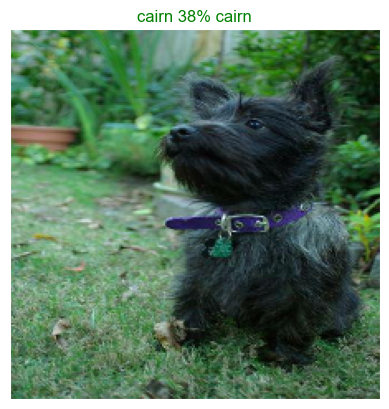

In [68]:
plot_pred(pred_prob=predictions,labels=val_label,images=val_images)

In [69]:
def plot_top_10_pred(prediction_prob,labels,n=1):
    pred_prob, true_label = prediction_prob[n],labels[n]
    pred_label = get_prediction_labels(pred_prob)
    top_10_indexes = pred_prob.argsort()[-10:][::-1]
    top_10_pred_values = pred_prob[top_10_indexes]
    top_10_pred_labels = unique_dog_labels[top_10_indexes]

    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color='grey')
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels= top_10_pred_labels,
               rotation='vertical')
    if np.isin(true_label,top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels ==  true_label)].set_color('green')
    else:
        pass


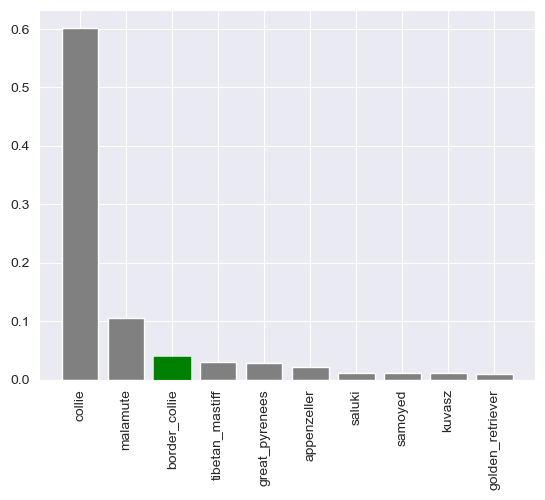

In [70]:
plot_top_10_pred(prediction_prob=predictions,
                 labels=val_label,
                 n=9)

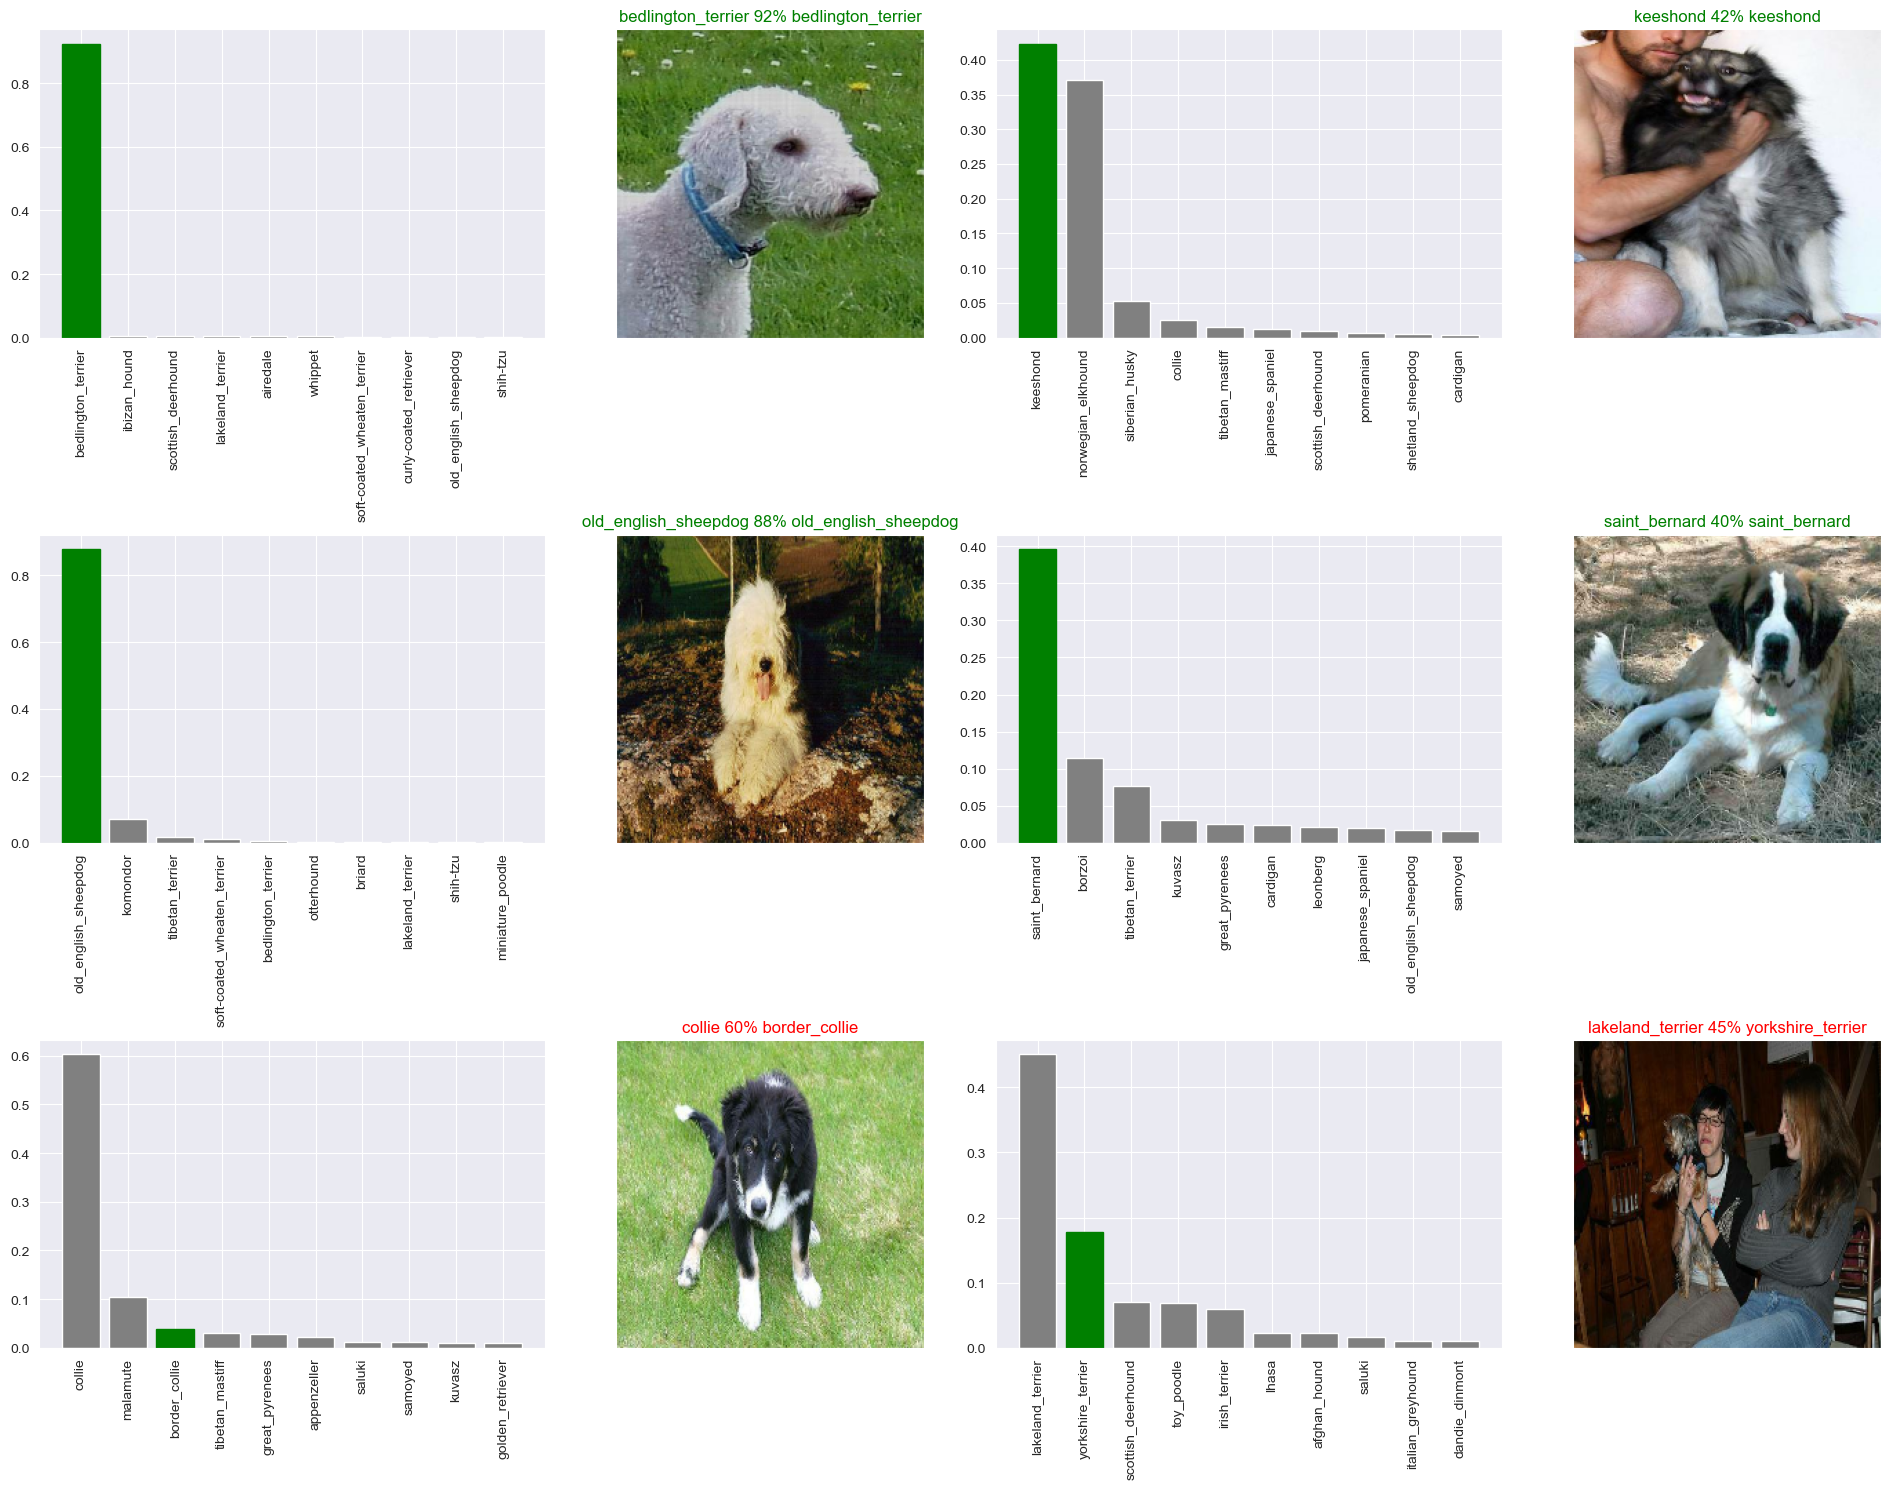

In [71]:
i_multiplier = 5
num_rows =3
num_cols = 2
num_images = num_rows* num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_top_10_pred(prediction_prob=predictions,
                     labels=val_label,
                     n=i+i_multiplier)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_pred(pred_prob=predictions,
              labels=val_label,
              images=val_images,
              n =i+i_multiplier)


    plt.tight_layout(h_pad=1.0)
plt.show()


In [72]:
 val_image


[array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [73]:
def save_model(model,suffix=None):
    model_dir = path.join('../dog_classification_TF/models/',
                          datetime.datetime.now().strftime('%y%m%d-%H%M%s'))
    model_path  = model_dir +'_'+suffix+".h5"
    model.save(model_path)
    print(f"saving model to ..",model_path)
    return model_path

In [74]:
def load_model(model_path):
    model= tf.keras.models.load_model(model_path,
                                      custom_objects={'KerasLayer': hub.KerasLayer})
    return model

In [75]:
save_model(model,suffix="1000-images-mobilev2-adam")

/Volumes/Work/programming/VENV/DSML_venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


saving model to .. ../dog_classification_TF/models/230608-15351686234935_1000-images-mobilev2-adam.h5


'../dog_classification_TF/models/230608-15351686234935_1000-images-mobilev2-adam.h5'

In [76]:
load_image_model_1000 = load_model('../dog_classification_TF/models/230608-14151686230120_1000-images-mobilev2-adam.h5')

In [77]:
model.evaluate(validation_data)

7/7 [==============================] - 1s 152ms/step - loss: 1.3729 - Accuracy: 0.6750


[1.3728821277618408, 0.675000011920929]

In [78]:
load_image_model_1000.evaluate(validation_data)

2023-06-08 15:35:37.751848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 177ms/step - loss: 1.4952 - Accuracy: 0.6000


[1.4951590299606323, 0.6000000238418579]

In [79]:
full_data = create_batch_data(X,Y)


training ...


In [80]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [81]:
full_model = create_model()

In [82]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopback = tf.keras.callbacks.EarlyStopping(monitor='Accuracy',
                                                             patience=3)
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard,full_model_early_stopback])

Epoch 1/100


2023-06-08 15:35:39.938275: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [10222,120]
	 [[{{node Placeholder/_1}}]]
2023-06-08 15:35:39.938396: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype bool and shape [10222,120]
	 [[{{node Placeholder/_1}}]]
2023-06-08 15:35:40.784528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


320/320 [==============================] - 58s 179ms/step - loss: 1.3303 - Accuracy: 0.6686
Epoch 2/100
320/320 [==============================] - 55s 171ms/step - loss: 0.4038 - Accuracy: 0.8785
Epoch 3/100
320/320 [==============================] - 54s 168ms/step - loss: 0.2374 - Accuracy: 0.9350
Epoch 4/100
320/320 [==============================] - 55s 171ms/step - loss: 0.1545 - Accuracy: 0.9642


In [83]:
save_model(full_model,suffix="full_image_set")


saving model to .. ../dog_classification_TF/models/230608-15391686235161_full_image_set.h5


'../dog_classification_TF/models/230608-15391686235161_full_image_set.h5'

In [86]:
load_full_model = load_model('../dog_classification_TF/models/230608-15391686235161_full_image_set.h5')

In [87]:
load_full_model

## Test data

In [90]:
test_path = '../dog_classification_TF/dog-breed-identification/test/'
test_file_names = [path.join(test_path,fname) for fname in listdir(test_path)]

In [92]:
test_file_names[:2]

['../dog_classification_TF/dog-breed-identification/test/266490a2b053a4a3bf68e779f28fb5a9.jpg',
 '../dog_classification_TF/dog-breed-identification/test/dae9fd18836d8df20989ef0101771d4b.jpg']

In [94]:
test_data = create_batch_data(test_file_names,test_data=True)

Testing...


In [95]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [96]:
test_predictions =load_full_model.predict(test_data,verbose=1)

2023-06-08 15:56:30.819306: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10357]
	 [[{{node Placeholder/_0}}]]
2023-06-08 15:56:30.905038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


324/324 [==============================] - 57s 175ms/step


In [97]:
np.savetxt('../dog_classification_TF/pred_arary.csv',test_predictions,delimiter=',')

In [98]:
np.loadtxt('../dog_classification_TF/pred_arary.csv',delimiter=',')

array([[1.43364002e-06, 8.74860198e-05, 2.17922502e-06, ...,
        5.49928227e-05, 6.79739969e-07, 3.31368391e-08],
       [5.59821632e-03, 6.17076969e-03, 2.30598416e-05, ...,
        8.15071471e-05, 1.47536693e-05, 6.72311216e-05],
       [8.88081468e-06, 1.67355225e-07, 6.00379213e-09, ...,
        6.96756342e-09, 9.46696943e-09, 7.58788321e-09],
       ...,
       [1.30240942e-05, 1.96068249e-05, 2.30157093e-05, ...,
        6.72535272e-03, 4.60725323e-06, 7.69584767e-06],
       [2.35703226e-08, 4.33021540e-07, 2.76593539e-07, ...,
        1.52246415e-07, 1.29069576e-07, 6.81918966e-09],
       [1.65546794e-06, 8.97196969e-06, 1.19465785e-05, ...,
        1.42693580e-05, 8.55728047e-07, 3.41961197e-07]])

In [99]:
test_predictions.shape

(10357, 120)

In [134]:
pred_df = pd.DataFrame(columns=['id']+list(unique_dog_labels))

In [135]:
pred_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [136]:
test_file_id = [path.splitext(f)[0] for f in listdir(test_path)]

In [137]:
pred_df['id'] = test_file_id

In [140]:
pred_df[list(unique_dog_labels)] = test_predictions

In [142]:
pred_df.shape

(10357, 121)

In [143]:
pred_df.to_csv("../dog_classification_TF/kaggle_submission_output.csv",index=False)

In [144]:
custom_image_path ='../dog_classification_TF/custom_images'

In [151]:
custom_images =[path.join(custom_image_path, fname) for fname in listdir(custom_image_path)]

In [152]:
custom_images

['../dog_classification_TF/custom_images/dog1.jpeg',
 '../dog_classification_TF/custom_images/dog3.jpeg',
 '../dog_classification_TF/custom_images/dog2.jpeg']

In [153]:
custom_data =create_batch_data(custom_images,test_data=True)

Testing...


In [154]:
custom_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [155]:
custom_image_pred = load_full_model.predict(custom_data)

2023-06-09 10:00:15.425258: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 1s 811ms/step


In [156]:
custom_pred_label = [get_prediction_labels(custom_image_pred[i]) for i in range(len(custom_image_pred))]

In [157]:
custom_pred_label

['labrador_retriever', 'appenzeller', 'whippet']

In [158]:
 custom_img = [img for img in custom_data.unbatch().as_numpy_iterator()]

2023-06-09 10:08:26.483739: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3]
	 [[{{node Placeholder/_0}}]]


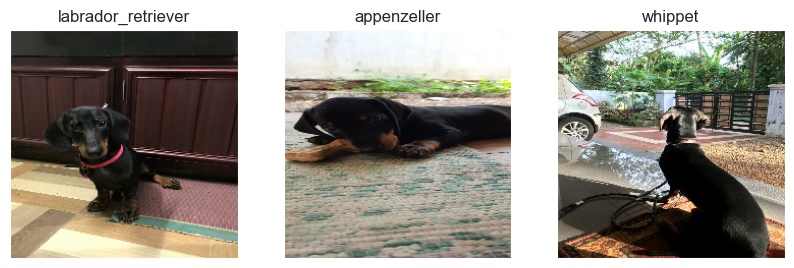

In [160]:
plt.figure(figsize=(10,10))
for i,image in enumerate(custom_img):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_label[i])
    plt.imshow(image)